In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Abundances

In [24]:
reg = pd.read_csv('../results/abundances_loc_reg.csv')
w = pd.read_csv('../results/abundances_loc_w.csv')

data = []

data.append(reg.iloc[:5])
data.append(reg.iloc[5:])

data.append(w.iloc[:5])
data.append(w.iloc[5:])
titles = ['Systematic Regular Random', 'Systematic Regular Clustered', 'Wageningen W Random', 'Wageningen W Clustered']

## Init Location

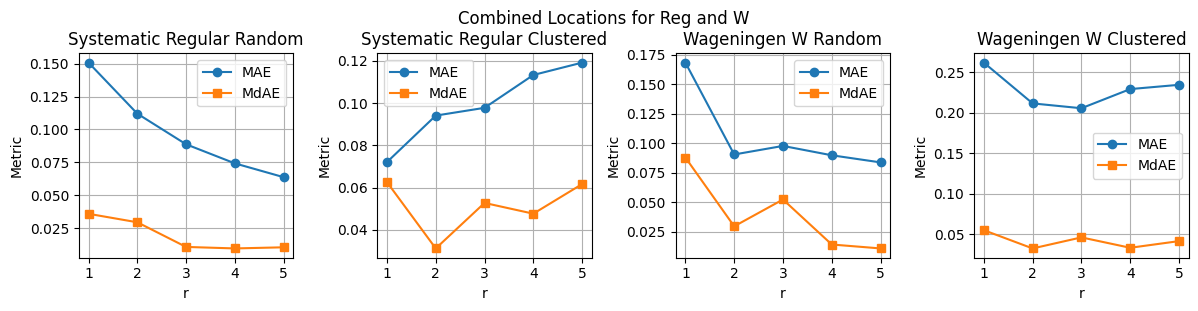

In [38]:
# Create the 4x3 subplot grid (12 subplots)
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop over each filename and corresponding subplot
for i, file_data in enumerate(data):  
    # Plot mae, mdae, and r2 against r in the ith subplot
    axs[i].plot(file_data['r'], file_data['mae'], label='MAE', marker='o')
    axs[i].plot(file_data['r'], file_data['mdae'], label='MdAE', marker='s')
    #axs[i].plot(file_data['r'], file_data['r2'], label='R2', marker='^')
    
    # Set title and labels for each subplot
    axs[i].set_title(f'{titles[i]}')
    axs[i].set_xlabel('r')
    axs[i].set_ylabel('Metric')
    
    # Add legend to each subplot
    axs[i].legend()
    
    # Add grid to each subplot
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Combined Locations for Reg and W', y=1.02)

# Display the plot
plt.show()

## Plot

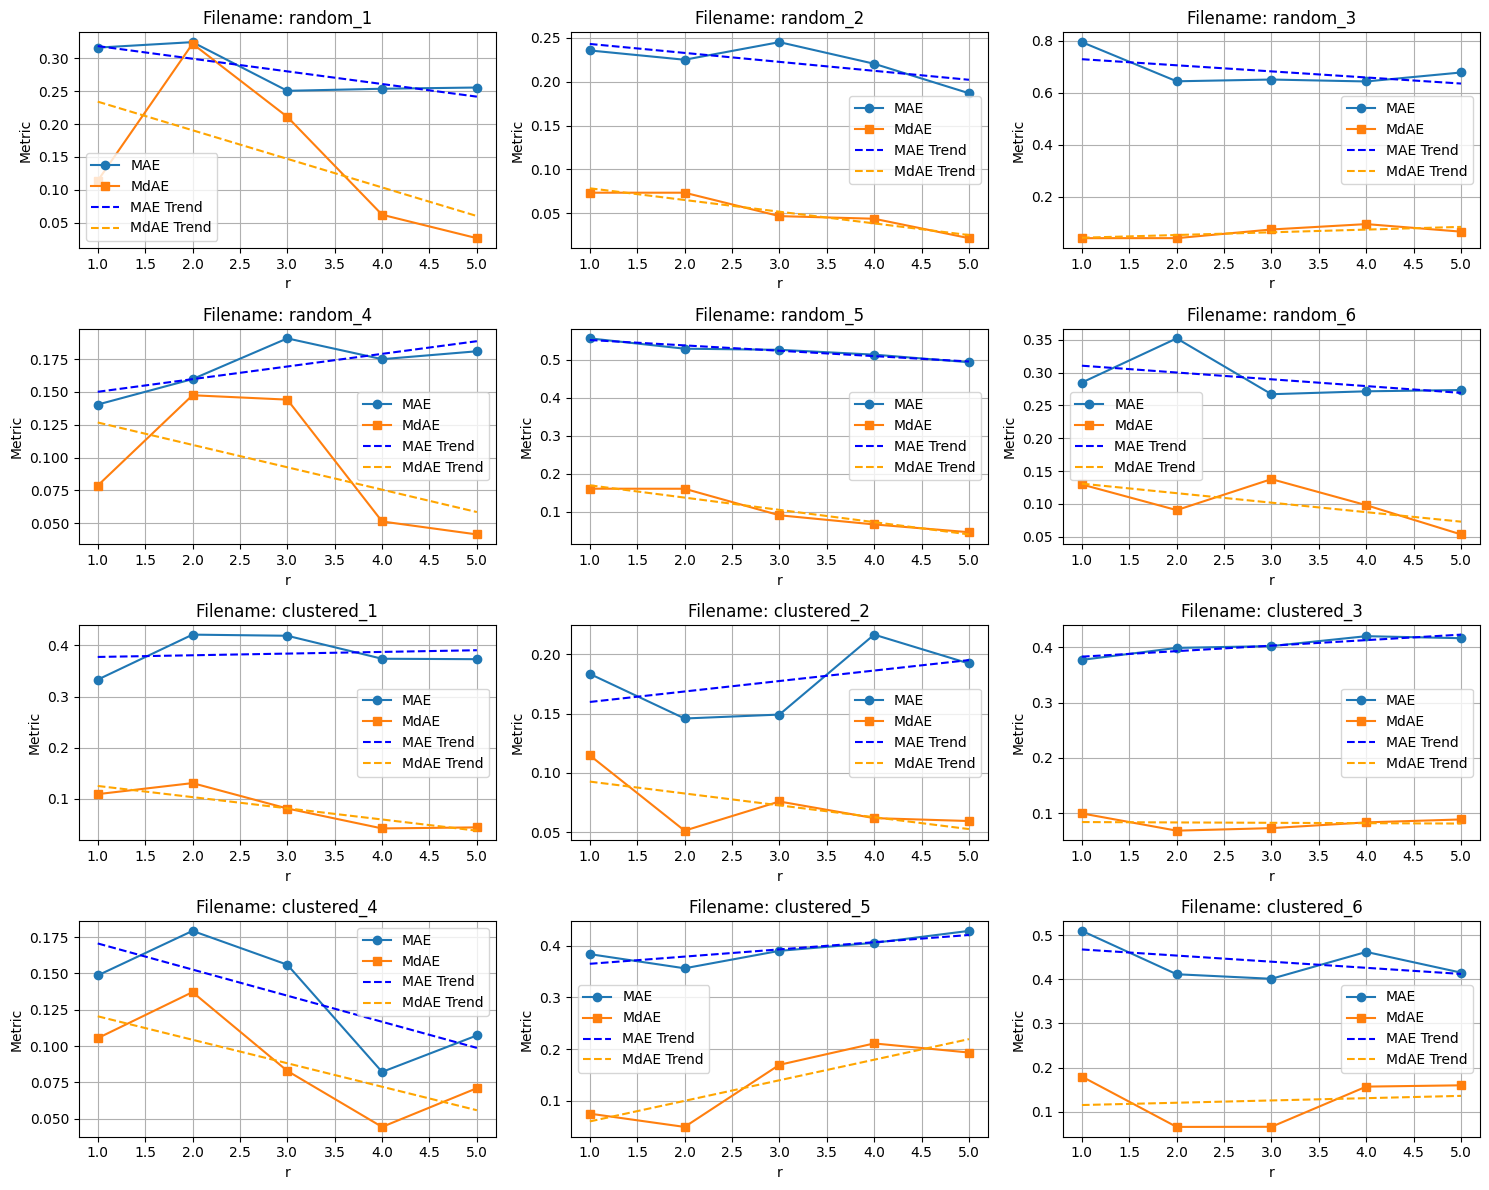

In [51]:

df = pd.read_csv('../results/abundances_plot_w.csv')
# Get unique filenames
unique_filenames = df['filename'].unique()

# Create the 4x3 subplot grid (12 subplots)
fig, axs = plt.subplots(4, 3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop over each filename and corresponding subplot
for i, filename in enumerate(unique_filenames):
    # Filter data for each filename
    file_data = df[df['filename'] == filename]
    
    # Plot mae, mdae, and r2 against r in the ith subplot
    axs[i].plot(file_data['r'], file_data['mae'], label='MAE', marker='o')
    axs[i].plot(file_data['r'], file_data['mdae'], label='MdAE', marker='s')
    #axs[i].plot(file_data['r'], file_data['r2'], label='R2', marker='^')
    
    # Fit a 1st-degree polynomial (linear trendline) for MAE and MdAE
    mae_poly = np.polyfit(file_data['r'], file_data['mae'], 1)
    mdae_poly = np.polyfit(file_data['r'], file_data['mdae'], 1)
    
    # Generate trendline values using np.polyval
    r_values = np.linspace(file_data['r'].min(), file_data['r'].max(), 100)
    mae_trend = np.polyval(mae_poly, r_values)
    mdae_trend = np.polyval(mdae_poly, r_values)
    
    # Plot the trendlines
    axs[i].plot(r_values, mae_trend, color='blue', linestyle='--', label='MAE Trend')
    axs[i].plot(r_values, mdae_trend, color='orange', linestyle='--', label='MdAE Trend')
    
    # Set title and labels for each subplot
    axs[i].set_title(f'Filename: {filename}')
    axs[i].set_xlabel('r')
    axs[i].set_ylabel('Metric')
    
    # Add legend to each subplot
    axs[i].legend()
    
    # Add grid to each subplot
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

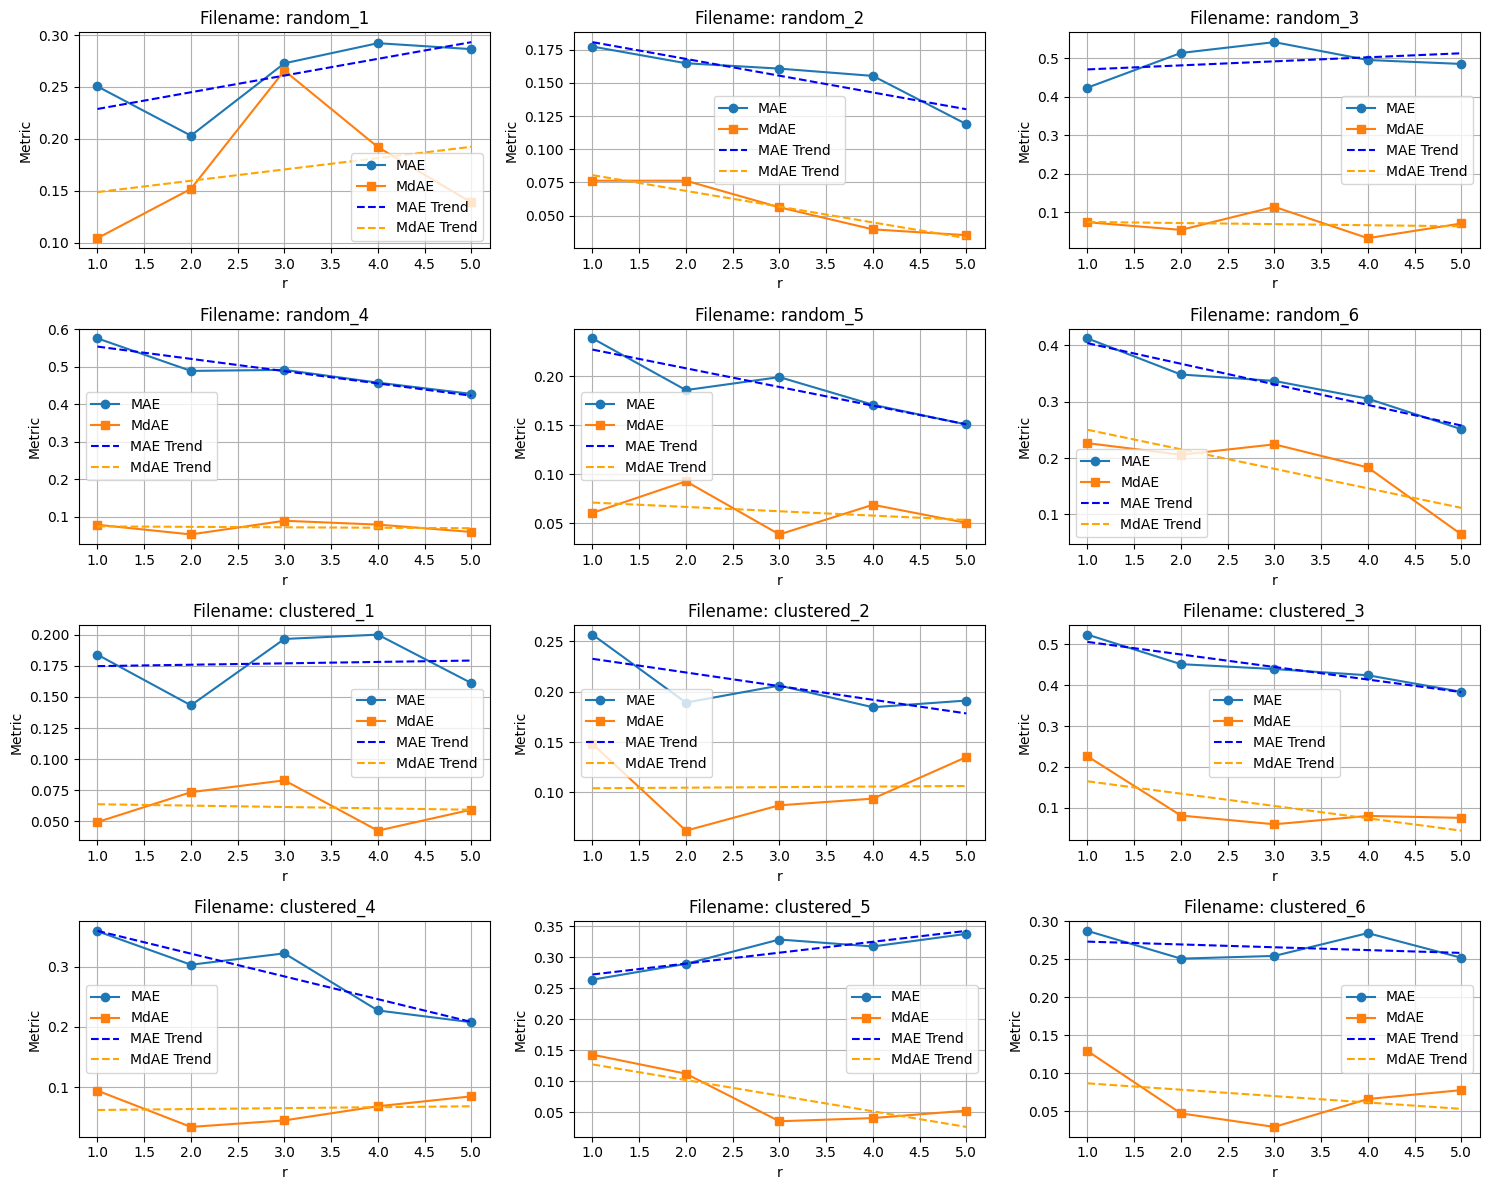

In [50]:
df = pd.read_csv('../results/abundances_plot_reg.csv')
# Get unique filenames
unique_filenames = df['filename'].unique()

# Create the 4x3 subplot grid (12 subplots)
fig, axs = plt.subplots(4, 3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop over each filename and corresponding subplot
for i, filename in enumerate(unique_filenames):
    # Filter data for each filename
    file_data = df[df['filename'] == filename]
    
    # Plot mae, mdae, and r2 against r in the ith subplot
    axs[i].plot(file_data['r'], file_data['mae'], label='MAE', marker='o')
    axs[i].plot(file_data['r'], file_data['mdae'], label='MdAE', marker='s')
    #axs[i].plot(file_data['r'], file_data['r2'], label='R2', marker='^')
    
    # Fit a 1st-degree polynomial (linear trendline) for MAE and MdAE
    mae_poly = np.polyfit(file_data['r'], file_data['mae'], 1)
    mdae_poly = np.polyfit(file_data['r'], file_data['mdae'], 1)
    
    # Generate trendline values using np.polyval
    r_values = np.linspace(file_data['r'].min(), file_data['r'].max(), 100)
    mae_trend = np.polyval(mae_poly, r_values)
    mdae_trend = np.polyval(mdae_poly, r_values)
    
    # Plot the trendlines
    axs[i].plot(r_values, mae_trend, color='blue', linestyle='--', label='MAE Trend')
    axs[i].plot(r_values, mdae_trend, color='orange', linestyle='--', label='MdAE Trend')
    
    # Set title and labels for each subplot
    axs[i].set_title(f'Filename: {filename}')
    axs[i].set_xlabel('r')
    axs[i].set_ylabel('Metric')
    
    # Add legend to each subplot
    axs[i].legend()
    
    # Add grid to each subplot
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_2736/4243455294.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_filenames))  # Use a colormap with distinct colors


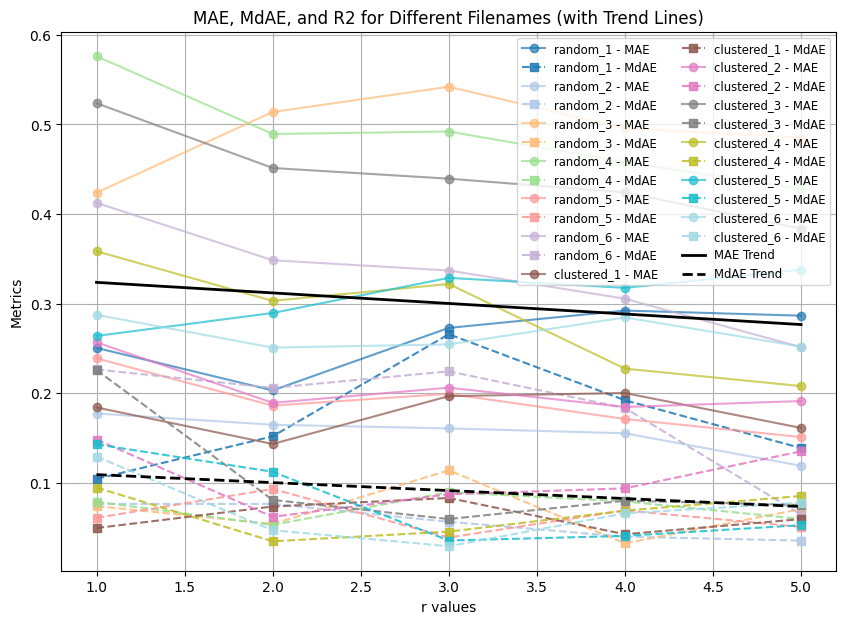

In [48]:
df = pd.read_csv('../results/abundances_plot_reg.csv')
# Get unique filenames
unique_filenames = df['filename'].unique()

# Create the plot
plt.figure(figsize=(10, 7))

# Define the colormap (for color shading)
cmap = plt.cm.get_cmap('tab20', len(unique_filenames))  # Use a colormap with distinct colors

# Loop over each filename and plot with different shades for mae, mdae, and r2
for i, filename in enumerate(unique_filenames):
    # Filter data for each filename
    file_data = df[df['filename'] == filename]
    
    # Get color for the current filename using colormap
    base_color = cmap(i)
    
    # Plot mae, mdae, and r2 with different shades of the base color
    plt.plot(file_data['r'], file_data['mae'], label=f'{filename} - MAE', color=base_color, linestyle='-', marker='o', alpha=0.7)
    plt.plot(file_data['r'], file_data['mdae'], label=f'{filename} - MdAE', color=base_color, linestyle='--', marker='s', alpha=0.85)
    #plt.plot(file_data['r'], file_data['r2'], label=f'{filename} - R2', color=base_color, linestyle=':', marker='^', alpha=1.0)

# Add trend lines for mae, mdae, and r2 using a polynomial fit
r_values = df['r'].unique()

# Fit a polynomial of degree 1 (linear fit) to mae, mdae, and r2
mae_trend = np.polyfit(df['r'], df['mae'], 1)
mdae_trend = np.polyfit(df['r'], df['mdae'], 1)
#r2_trend = np.polyfit(df['r'], df['r2'], 1)

# Create a range of r values for plotting the trend line
r_fit = np.linspace(r_values.min(), r_values.max(), 100)

# Plot the trend lines
plt.plot(r_fit, np.polyval(mae_trend, r_fit), color='black', linestyle='-', label='MAE Trend', linewidth=2)
plt.plot(r_fit, np.polyval(mdae_trend, r_fit), color='black', linestyle='--', label='MdAE Trend', linewidth=2)
#plt.plot(r_fit, np.polyval(r2_trend, r_fit), color='black', linestyle=':', label='R2 Trend', linewidth=2)

# Add labels and title
plt.xlabel('r values')
plt.ylabel('Metrics')
plt.title('MAE, MdAE, and R2 for Different Filenames (with Trend Lines)')

# Show the legend
plt.legend(ncol=2, fontsize='small')

# Add grid
plt.grid(True)

# Display the plot
plt.show()

# Sample